<a href="https://colab.research.google.com/github/bharathvariar/FoDS/blob/main/1Bb_Polynomial_Regression_with_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression with Regularization
Bharath Variar, 2019B5A70930H <br>
Kanika Gandhi, 2019B5A71080H <br>
Karan Moza, 2019B4A71372H 

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

%matplotlib inline

## Defining Functions

In [ ]:
def pol_feat(mat, deg):
    if deg == 1:
        mat = mat.to_numpy()
        m, n = mat.shape
        return mat.reshape(n, m), n

    for i in range(0, deg + 1):
        mat = pd.concat(
            [mat, pd.DataFrame(mat["MLOGP"] ** (deg - i) * mat["RDCHI"] ** i)], axis=1
        )

    if deg > 1:
        return pol_feat(mat, deg - 1)

In [ ]:
def initialize(dim):
    b = random.random()
    theta = np.random.rand(1, dim) * 0.01
    return b, theta

### Gradient Descent

In [ ]:
def r_cost(y, t, theta, l, q):
    return 0.5 * np.sum(np.power((t - y), 2)) / y.shape[1] + (l / 2) * np.sum(
        np.power(abs(theta), q)
    )

In [ ]:
def r_gradient_descent(num_epochs, X, t, theta, bias, learning_rate, q, l):
    # forward-propagation
    costs = []
    for iter in range(num_epochs):
        y = np.dot(theta, X) + bias

        loss = r_cost(y, t, theta, l, q)
        costs.append(loss)

        # back propagation
        r_dW = (1 / y.shape[1]) * np.dot(y - t, X.T) + q * (l / 2) * np.power(
            theta, q - 1
        )
        dBias = (1 / y.shape[1]) * np.sum((y - t))

        # updation
        theta = theta - learning_rate * r_dW
        bias = bias - learning_rate * dBias

    return costs

In [ ]:
def r1_gradient_descent(num_epochs, X, t, theta, bias, learning_rate, q, l):

    # forward-prop
    costs = []
    der = np.array([0, 0])
    for iter in range(num_epochs):
        y = np.dot(theta, X) + bias

        loss = r_cost(y, t, theta, l, q)
        costs.append(loss)

        # backprop
        if q == 0.5:
            r_dW = (1 / y.shape[1]) * np.dot(y - t, X.T) + q * (l / 2) * np.power(
                abs(theta), q - 1
            )
        else:
            if abs(theta[0][0]) == theta[0][0]:
                der[0] = 1
            else:
                der[0] = -1
            if abs(theta[0][1]) == theta[0][1]:
                der[1] = 1
            else:
                der[1] = -1
            r_dW = (1 / y.shape[1]) * np.dot(y - t, X.T) + (l / 2) * der

        dBias = (1 / y.shape[1]) * np.sum((y - t))

        # updation
        theta = theta - learning_rate * r_dW
        bias = bias - learning_rate * dBias

    return costs

In [ ]:
def testing(X, t, theta, bias, learning_rate, q, l):
    y = np.dot(theta, X) + bias
    error = r_cost(y, t, theta, l, q)
    return error

## Dataset handling

In [ ]:
df = pd.read_csv("fods_1.csv")
df.head()

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979


### Shuffling and splitting data into training and testing subsets

In [ ]:
# Shuffling the dataset
shuffled_df = df.sample(frac=1, random_state=42)

# Define a size for your train set
training_data_size = int(0.8 * len(df))

# Split your dataset
training_data = shuffled_df[:training_data_size]
testing_data = shuffled_df[training_data_size:]

In [ ]:
X_train = training_data[["MLOGP", "RDCHI"]]
y_train = training_data["quantitative response of LC50"]
X_test = testing_data[["MLOGP", "RDCHI"]]
y_test = testing_data["quantitative response of LC50"]

Polynomial of the form:
$$ y = w_0 + w_1.x + w_2.x^2 +\dots+ w_9.x^9 $$

In [ ]:
data, num_features = pol_feat(X_train, 1)
test_data, num_features = pol_feat(X_test, 1)

In [ ]:
# normalizing training data
mean = np.mean(data, axis=1, keepdims=True)
std = np.std(data, axis=1, keepdims=True)
data = (data - mean) / std

In [ ]:
# normalizing testing data
test_data = (test_data - mean) / std

In [ ]:
train_err_arr = []
test_err_arr = []

## Implementation

### `q` = 0.5, 
`learning_rate` = 0.1 <br>
`lambda(l)` = $1.0 \times 10^{-4}$

Training error = 1.44985873


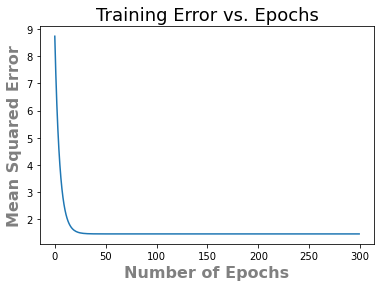

In [ ]:
b, theta = initialize(num_features)
costs_q1 = r1_gradient_descent(
    300, data, y_train.to_numpy().reshape(1, -1), theta, b, 0.1, 0.5, 1.0e-4
)
print(f"Training error = {costs_q1[-1]:0.8f}")
train_err_arr.append(costs_q1[-1])
fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(costs_q1)
t = ax.set_title(f"Training Error vs. Epochs", fontsize=18)
x = ax.set_xlabel("Number of Epochs", fontsize=16, fontweight="bold", color="gray")
y = ax.set_ylabel("Mean Squared Error", fontsize=16, fontweight="bold", color="gray")

In [ ]:
test_error = testing(
    test_data, y_test.to_numpy().reshape(1, -1), theta, b, 0.1, 0.5, 1.0e-4
)
print(f"Testing error = {test_error:.8f}")
test_err_arr.append(test_error)

Testing error = 7.63266510


### `q` = 1, 
`learning_rate` = 0.1 <br>
`l` = $1.0 \times 10^{-4}$

Training error = 1.44984179


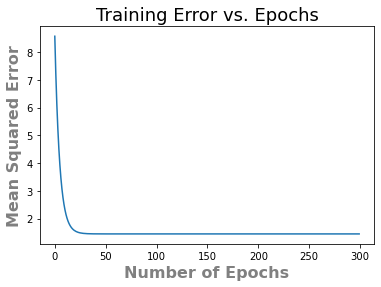

In [ ]:
b, theta = initialize(num_features)
costs_q2 = r1_gradient_descent(
    300, data, y_train.to_numpy().reshape(1, -1), theta, b, 0.1, 1, 1.0e-4
)
print(f"Training error = {costs_q2[-1]:0.8f}")
train_err_arr.append(costs_q2[-1])
fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(costs_q2)
t = ax.set_title(f"Training Error vs. Epochs", fontsize=18)
x = ax.set_xlabel("Number of Epochs", fontsize=16, fontweight="bold", color="gray")
y = ax.set_ylabel("Mean Squared Error", fontsize=16, fontweight="bold", color="gray")

In [ ]:
test_error = testing(
    test_data, y_test.to_numpy().reshape(1, -1), theta, b, 0.1, 1, 1.0e-4
)
print(f"Testing error = {test_error:.8f}")
test_err_arr.append(test_error)

Testing error = 7.47012114


### `q` = 2, 
`learning_rate` = 0.1 <br>
`l` = $1.0 \times 10^{-4}$

Training error = 1.44983705


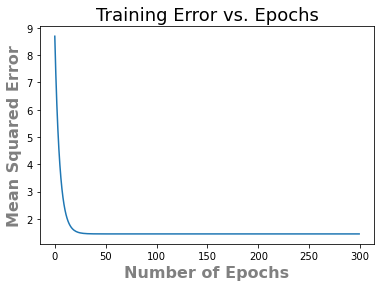

In [ ]:
b, theta = initialize(num_features)
costs_q3 = r_gradient_descent(
    300, data, y_train.to_numpy().reshape(1, -1), theta, b, 0.1, 2, 1.0e-4
)
print(f"Training error = {costs_q3[-1]:0.8f}")
train_err_arr.append(costs_q3[-1])
fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(costs_q3)
t = ax.set_title(f"Training Error vs. Epochs", fontsize=18)
x = ax.set_xlabel("Number of Epochs", fontsize=16, fontweight="bold", color="gray")
y = ax.set_ylabel("Mean Squared Error", fontsize=16, fontweight="bold", color="gray")

In [ ]:
test_error = testing(
    test_data, y_test.to_numpy().reshape(1, -1), theta, b, 0.1, 2, 1.0e-4
)
print(f"Testing error = {test_error:.8f}")
test_err_arr.append(test_error)

Testing error = 7.58703214


### `q` = 4, 
`learning_rate` = 0.1 <br>
`l` = $1.0 \times 10^{-4}$

Training error = 1.44983654


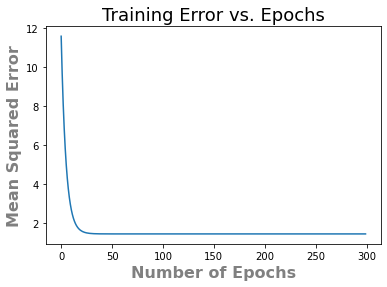

In [ ]:
b, theta = initialize(num_features)
costs_q4 = r_gradient_descent(
    300, data, y_train.to_numpy().reshape(1, -1), theta, b, 0.1, 4, 1.0e-4
)
print(f"Training error = {costs_q4[-1]:0.8f}")
train_err_arr.append(costs_q4[-1])
fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(costs_q4)
t = ax.set_title(f"Training Error vs. Epochs", fontsize=18)
x = ax.set_xlabel("Number of Epochs", fontsize=16, fontweight="bold", color="gray")
y = ax.set_ylabel("Mean Squared Error", fontsize=16, fontweight="bold", color="gray")

In [ ]:
test_error = testing(
    test_data, y_test.to_numpy().reshape(1, -1), theta, b, 0.1, 4, 1.0e-4
)
print(f"Testing error = {test_error:.8f}")
test_err_arr.append(test_error)

Testing error = 10.32667100


## Visualization

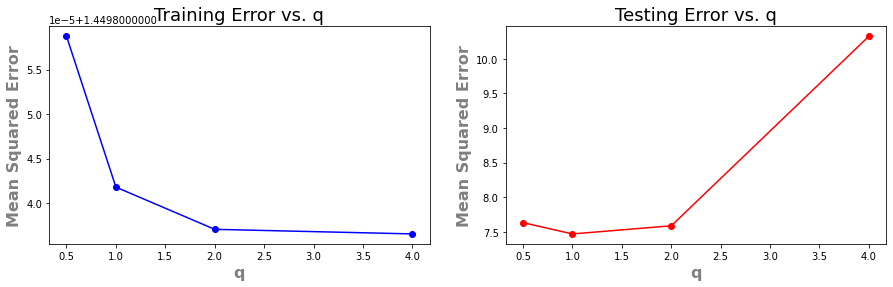

In [ ]:
q_val = [0.5, 1, 2, 4]
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15, 4))
ax1.plot(q_val, train_err_arr, "bo-")
t = ax1.set_title(f"Training Error vs. q", fontsize=18)
x = ax1.set_xlabel("q", fontsize=16, fontweight="bold", color="gray")
y = ax1.set_ylabel("Mean Squared Error", fontsize=16, fontweight="bold", color="gray")
ax2.plot(q_val, test_err_arr, "ro-")
t = ax2.set_title(f"Testing Error vs. q", fontsize=18)
x = ax2.set_xlabel("q", fontsize=16, fontweight="bold", color="gray")
y = ax2.set_ylabel("Mean Squared Error", fontsize=16, fontweight="bold", color="gray")